In [2]:
# Basic EDA: df.isnull().sum() , df.dtypes , df.describe() , 
# df.nunique() to number of unique values for each column


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
delay_data = ('/Users/CalvinChua/Desktop/2017_Nov_ONTIME.csv')

In [5]:
dd_df = pd.read_csv(delay_data, low_memory=False)

In [6]:
print(dd_df.head())

   YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER TAIL_NUM  FL_NUM  \
0  2017     11            14            2             AA   N954AA    1900   
1  2017     11            15            3             AA   N949AA    1900   
2  2017     11            16            4             AA   N949AA    1900   
3  2017     11            17            5             AA   N963AA    1900   
4  2017     11            18            6             AA   N945AA    1900   

  ORIGIN ORIGIN_CITY_NAME DEST         ...          DIVERTED  \
0    MSP  Minneapolis, MN  PHL         ...                 0   
1    MSP  Minneapolis, MN  PHL         ...                 0   
2    MSP  Minneapolis, MN  PHL         ...                 0   
3    MSP  Minneapolis, MN  PHL         ...                 0   
4    MSP  Minneapolis, MN  PHL         ...                 0   

   CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  \
0               169                137.0     121.0       980            N

In [7]:
# Let's drop the columns that are not needed
dd_df.drop(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME'], axis = 1, inplace = True)

# Let's drop rows that lack data for important features
total_rows = len(dd_df.index)
print("total_rows = " + str(total_rows))
dd_df.dropna(subset = ['UNIQUE_CARRIER', 'DEP_DELAY', 'ORIGIN', 'ARR_DELAY'], inplace = True)
data_rows = len(dd_df.index)
data_retained = (data_rows/total_rows)*100
print("Percentage of data retained: " + str(data_retained) + "%")

total_rows = 454162
Percentage of data retained: 99.56116980284568%


In [8]:
dd_df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,452169.0,452169.0,452169.000000,452169.000000,452169.000000,452169.000000,452169.000000,452169.000000,452169.000000,452169.000000,...,452169.0,452169.000000,452169.000000,452169.000000,452169.000000,51298.000000,51298.000000,51298.000000,51298.000000,51298.000000
mean,2017.0,11.0,15.478848,3.918398,2223.281370,1327.957655,1328.547959,4.262692,16.166011,7.061075,...,0.0,147.069481,139.627330,116.400244,848.220528,21.044524,1.487173,13.166966,0.312137,21.437366
std,0.0,0.0,8.676997,1.952469,1815.295878,493.294830,501.332188,33.043394,7.945221,5.260639,...,0.0,76.648244,75.782657,73.792645,616.464367,62.520749,20.388478,29.815757,8.178943,43.813923
min,2017.0,11.0,1.000000,1.000000,1.000000,1.000000,1.000000,-63.000000,1.000000,1.000000,...,0.0,22.000000,16.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,11.0,8.000000,2.000000,759.000000,910.000000,912.000000,-6.000000,11.000000,4.000000,...,0.0,90.000000,84.000000,62.000000,391.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.0,11.0,15.000000,4.000000,1719.000000,1320.000000,1324.000000,-3.000000,14.000000,6.000000,...,0.0,128.000000,121.000000,98.000000,679.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,2017.0,11.0,23.000000,6.000000,3158.000000,1735.000000,1738.000000,2.000000,19.000000,8.000000,...,0.0,179.000000,171.000000,146.000000,1085.000000,19.000000,0.000000,17.000000,0.000000,25.000000
max,2017.0,11.0,30.000000,7.000000,7439.000000,2359.000000,2400.000000,1700.000000,172.000000,174.000000,...,0.0,670.000000,745.000000,700.000000,4983.000000,1700.000000,1254.000000,1549.000000,827.000000,1289.000000


In [9]:
dd_df.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CRS_ELAPSED_TIME         int64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [10]:
dd_df.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
UNIQUE_CARRIER              0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE      452169
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY          400871
WEATHER_DELAY          400871
NAS_DELAY              400871
SECURITY_DELAY         400871
LATE_AIRCRAFT_DELAY    400871
dtype: int64

In [11]:
dd_df.nunique()

YEAR                      1
MONTH                     1
DAY_OF_MONTH             30
DAY_OF_WEEK               7
UNIQUE_CARRIER           12
TAIL_NUM               4353
FL_NUM                 7061
ORIGIN                  286
DEST                    287
CRS_DEP_TIME           1218
DEP_TIME               1364
DEP_DELAY               716
TAXI_OUT                137
TAXI_IN                 126
CRS_ARR_TIME           1398
ARR_TIME               1439
ARR_DELAY               739
CANCELLED                 1
CANCELLATION_CODE         0
DIVERTED                  1
CRS_ELAPSED_TIME        446
ACTUAL_ELAPSED_TIME     621
AIR_TIME                603
DISTANCE               1244
CARRIER_DELAY           582
WEATHER_DELAY           242
NAS_DELAY               290
SECURITY_DELAY          115
LATE_AIRCRAFT_DELAY     388
dtype: int64

In [12]:
# Step 1: To add in a categorical column to identify "1" as delay (dep/arrival) and "0" for no delay (dep/arrival)
# Step 2: use groupby to see delay are mostly on (1)which day, (2) which airline,
#(3) which airport, (4) reason for delay

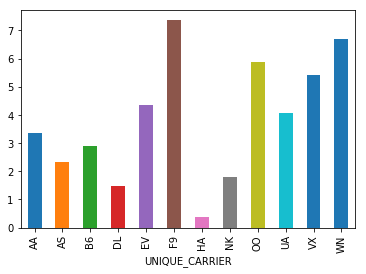

In [13]:
delay_mean = (dd_df.groupby('UNIQUE_CARRIER').DEP_DELAY.mean())
delay_mean.plot(kind='bar')

In [14]:
# How many dep delays (FAA: >= 15 mins) per carrier?

# Add new column to categorise delay: 1 for delay, 0 for no delay

dd_df['DELAYED'] = dd_df['DEP_DELAY'] > 14
dd_df.DELAYED = dd_df.DELAYED.astype(int)
#dd_df.head()
dd_df.groupby(['UNIQUE_CARRIER', 'DELAYED']).count()

# Can we find % of delays for each airline?


YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  TAIL_NUM  \
UNIQUE_CARRIER DELAYED                                                      
AA             0        62337  62337         62337        62337     62337   
               1         7157   7157          7157         7157      7157   
AS             0        12815  12815         12815        12815     12815   
               1         1661   1661          1661         1661      1661   
B6             0        20348  20348         20348        20348     20348   
               1         3215   3215          3215         3215      3215   
DL             0        68870  68870         68870        68870     68870   
               1         5418   5418          5418         5418      5418   
EV             0        17890  17890         17890        17890     17890   
               1         2621   2621          2621         2621      2621   
F9             0         7740   7740          7740         7740      7740   
               1         1396   1396          1396         1396      1396   
HA             0         6013   6013          6013         6013      6013   
               1          454    454           454          454       454   
NK             0        11519  11519         11519        11519     11519   
               1         1227   1227          1227         1227      1227   
OO             0        51698  51698         51698        51698     51698   
               1         7046   7046          7046         7046      7046   
UA             0        42762  42762         42762        42762     42762   
               1         5530   5530          5530         5530      5530   
VX             0         5003   5003          5003         5003      5003   
               1         1019   1019          1019         1019      1019   
WN             0        91929  91929         91929        91929     91929   
               1        16501  16501         16501        16501     16501   

                        FL_NUM  ORIGIN   DEST  CRS_DEP_TIME  DEP_TIME  \
UNIQUE_CARRIER DELAYED                                                  
AA             0         62337   62337  62337         62337     62337   
               1          7157    7157   7157          7157      7157   
AS             0         12815   12815  12815         12815     12815   
               1          1661    1661   1661          1661      1661   
B6             0         20348   20348  20348         20348     20348   
               1          3215    3215   3215          3215      3215   
DL             0         68870   68870  68870         68870     68870   
               1          5418    5418   5418          5418      5418   
EV             0         17890   17890  17890         17890     17890   
               1          2621    2621   2621          2621      2621   
F9             0          7740    7740   7740          7740      7740   
               1          1396    1396   1396          1396      1396   
HA             0          6013    6013   6013          6013      6013   
               1           454     454    454           454       454   
NK             0         11519   11519  11519         11519     11519   
               1          1227    1227   1227          1227      1227   
OO             0         51698   51698  51698         51698     51698   
               1          7046    7046   7046          7046      7046   
UA             0         42762   42762  42762         42762     42762   
               1          5530    5530   5530          5530      5530   
VX             0          5003    5003   5003          5003      5003   
               1          1019    1019   1019          1019      1019   
WN             0         91929   91929  91929         91929     91929   
               1         16501   16501  16501         16501     16501   

                               ...           DIVERTED  CRS_ELAPSED_TIME  \
UNIQUE_CARRIER DELAYED         ...              

                           FL_NUM
UNIQUE_CARRIER DELAYED           
AA             0        89.849654
               1        10.150346
AS             0        88.048471
               1        11.951529
B6             0        86.272331
               1        13.727669
DL             0        92.686419
               1         7.313581
EV             0        86.800227
               1        13.199773
F9             0        83.195678
               1        16.804322
HA             0        93.568770
               1         6.431230
NK             0        90.472878
               1         9.527122
OO             0        88.226164
               1        11.773836
UA             0        88.116873
               1        11.883127
VX             0        83.117354
               1        16.882646
WN             0        83.577041
               1        16.422959


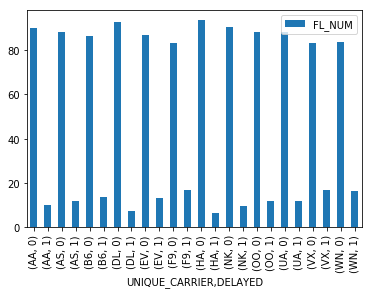

In [15]:
# Lets do a subset for delays

delays = dd_df[['UNIQUE_CARRIER', 'DELAYED', 'FL_NUM']]
#print(delays.head())

#delay_count = dd_df.groupby(['UNIQUE_CARRIER', 'DELAYED']).FL_NUM.count()
#print(delay_count)
#delay_count.plot(kind='bar')


delay_count = dd_df.groupby(['UNIQUE_CARRIER', 'DELAYED']).agg({'FL_NUM': 'sum'})
# Change: groupby delay_count and divide by sum
delay_pcts = delay_count.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
print(delay_pcts)
delay_pcts.plot(kind='bar')

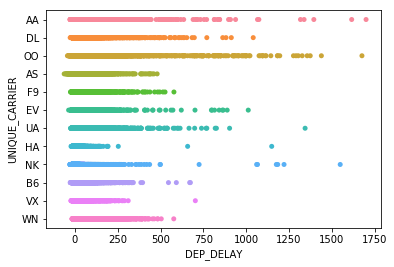

In [16]:
airline_mins = sns.stripplot(x='DEP_DELAY', y='UNIQUE_CARRIER', data = dd_df, orient='h')

In [17]:
# Lets do a subset for delays

delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]
delay_reason_count = delay_reason.groupby('UNIQUE_CARRIER').CARRIER_DELAY.count()
print(delay_reason_count)
#print(delay_reason.head())

UNIQUE_CARRIER
AA     7638
AS     2299
B6     3082
DL     4642
EV     2730
F9     1259
HA      662
NK     1252
OO     8111
UA     5465
VX     1268
WN    12890
Name: CARRIER_DELAY, dtype: int64


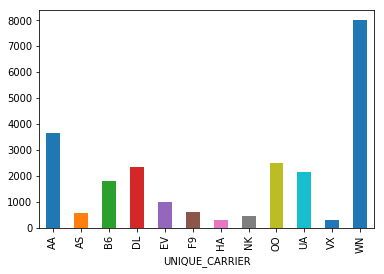

In [18]:
delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DELAYED']]

#delay_reason = delay_reason.dropna().count()

#carrier_delay
carrier_delay = delay_reason[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'DELAYED']]

carrier_delay = carrier_delay.dropna()
carrier_delay = carrier_delay.loc[(carrier_delay['CARRIER_DELAY'] != 0) & carrier_delay['DELAYED'] == 1]
#carrier_delay[(carrier_delay != 0).all(1)]
#carrier_delay_count = carrier_delay.groupby(['UNIQUE_CARRIER']).count()
#print(carrier_delay_count)

carrier_delay_count = carrier_delay.groupby('UNIQUE_CARRIER').CARRIER_DELAY.count()
carrier_delay_count.plot(kind='bar')


#print(carrier_delay.info)
#print(carrier_delay.count())

#delay_reason_count = delay_reason.count()
#print(delay_count)
#carrier_delay_count = delay_reason.count()
#print(carrier_delay_count)
#carrier_delay = delay_reason.groupby('CARRIER_DELAY').count()
#print(carrier_delay)
#carrier_delay = carrier_delay.iloc[1:,]
#print(delay_reason.head())
#print(carrier_delay.head())
#carrier_delay = carrier_delay.groupby('UNIQUE_CARRIER').CARRIER_DELAY.count()
#print(carrier_delay)

#delay_reason_count = delay_reason_count.groupby('UNIQUE_CARRIER').count()


#delay_reason_count = carrier_delay_count.groupby('UNIQUE_CARRIER').count()
#print(delay_reason_count)


#carrier_delay = dd_df.groupby(['UNIQUE_CARRIER', 'DELAYED']).agg({'CARRIER_DELAY': 'sum'})
# Change: groupby delay_count and divide by sum
#carrier_delay_pcts = carrier_delay.groupby(level=0).apply(lambda x:
#                                                 100 * x / float(x.sum()))
#print(carrier_delay_pcts)
#delay_pcts.plot(kind='bar')

In [19]:
#delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
#                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]
#delay_reason_count = delay_reason.groupby('UNIQUE_CARRIER').count()
#print(delay_reason_count.head())
#print(delay_reason.head())


#carrier_delay_count = delay_reason.groupby(['UNIQUE_CARRIER', 'DELAYED']).CARRIER_DELAY.count()
#print(carrier_delay_count)
#delay_count.plot(kind='bar')

#carrier_delay_count = delay_reason.groupby(['UNIQUE_CARRIER', 'DELAYED']).agg({'CARRIER_DELAY': 'sum'})
# Change: groupby delay_count and divide by sum
#carrier_delay_pcts = carrier_delay_count.groupby(level=0).apply(lambda x:
#                                                 100 * x / float(x.sum()))
#print(carrier_delay_pcts)
#delay_pcts.plot(kind='bar')

In [20]:
delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DELAYED']]

#delay_reason = delay_reason.dropna().count()

#weather_delay
weather_delay = delay_reason[['UNIQUE_CARRIER', 'WEATHER_DELAY', 'DELAYED']]

weather_delay = weather_delay.dropna()
weather_delay = weather_delay.loc[(weather_delay['WEATHER_DELAY'] != 0) & weather_delay['DELAYED'] == 1]

weather_delay_count = weather_delay.groupby('UNIQUE_CARRIER').WEATHER_DELAY.count()
print(weather_delay_count)
#weather_delay_count.plot(kind='bar')

UNIQUE_CARRIER
AA    104
AS    115
B6     11
DL    147
EV     31
F9      9
HA      8
NK     10
OO    300
UA     55
VX     21
WN    134
Name: WEATHER_DELAY, dtype: int64


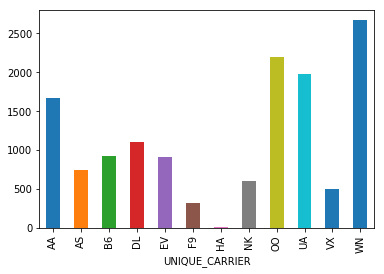

In [21]:
#nas_delay_count = delay_reason.groupby(['UNIQUE_CARRIER', 'DELAYED']).NAS_DELAY.count()
#print(nas_delay_count)

delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DELAYED']]

#delay_reason = delay_reason.dropna().count()

#weather_delay
nas_delay = delay_reason[['UNIQUE_CARRIER', 'NAS_DELAY', 'DELAYED']]

nas_delay = nas_delay.dropna()
nas_delay = nas_delay.loc[(nas_delay['NAS_DELAY'] != 0) & nas_delay['DELAYED'] == 1]

nas_delay_count = nas_delay.groupby('UNIQUE_CARRIER').NAS_DELAY.count()
#print(nas_delay_count)
nas_delay_count.plot(kind='bar')

In [22]:
#security_delay_count = delay_reason.groupby(['UNIQUE_CARRIER', 'DELAYED']).SECURITY_DELAY.count()
#print(security_delay_count)

delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DELAYED']]

#delay_reason = delay_reason.dropna().count()

#security_delay
security_delay = delay_reason[['UNIQUE_CARRIER', 'SECURITY_DELAY', 'DELAYED']]

security_delay = security_delay.dropna()
security_delay = security_delay.loc[(security_delay['SECURITY_DELAY'] != 0) & security_delay['DELAYED'] == 1]

security_delay_count = security_delay.groupby('UNIQUE_CARRIER').SECURITY_DELAY.count()
print(security_delay_count)
#nas_delay_count.plot(kind='bar')

UNIQUE_CARRIER
AA    57
AS    17
B6    30
DL     9
HA     1
NK    17
OO    16
VX    15
WN    80
Name: SECURITY_DELAY, dtype: int64


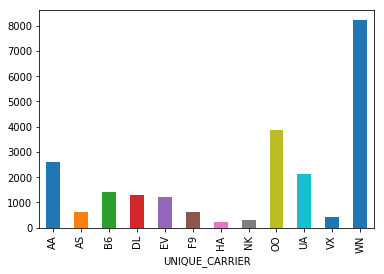

In [23]:
#lateaircraft_delay_count = delay_reason.groupby(['UNIQUE_CARRIER', 'DELAYED']).LATE_AIRCRAFT_DELAY.count()
#print(lateaircraft_delay_count)

delay_reason = dd_df[['UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                      'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DELAYED']]

#delay_reason = delay_reason.dropna().count()

#late_aircraft_delay
late_aircraft_delay = delay_reason[['UNIQUE_CARRIER', 'LATE_AIRCRAFT_DELAY', 'DELAYED']]

late_aircraft_delay = late_aircraft_delay.dropna()
late_aircraft_delay = late_aircraft_delay.loc[(late_aircraft_delay['LATE_AIRCRAFT_DELAY'] != 0) & late_aircraft_delay['DELAYED'] == 1]

late_aircraft_delay_count = late_aircraft_delay.groupby('UNIQUE_CARRIER').LATE_AIRCRAFT_DELAY.count()
#print(late_aircraft_delay_count)
late_aircraft_delay_count.plot(kind='bar')

#delay_count = dd_df.groupby(['UNIQUE_CARRIER', 'DELAYED']).agg({'LATE_AIRCRAFT_DELAY': 'sum'})
# Change: groupby delay_count and divide by sum
#delay_pcts = delay_count.groupby(level=0).apply(lambda x:
#                                                 100 * x / float(x.sum()))
#print(delay_pcts)
#delay_pcts.plot(kind='bar')

In [38]:
# Lets do a subset for city delays to find the city with the most delays

#city_delays = dd_df[['ORIGIN', 'DELAYED', 'FL_NUM']]
#print(city_delays.head())

#pop_city = dd_df.groupby('ORIGIN').count()
#pop_city_sort = pop_city.sort_values('UNIQUE_CARRIER', ascending = False)
#print(pop_city_sort.head())

delay_carrier = dd_df[dd_df.CARRIER_DELAY > 0]
delay_city = delay_carrier[delay_carrier.DELAYED > 0]
print(delay_city.head())

#pop_city = delay_flight.sort_values('ORIGIN', ascending = False)
#print(pop_city_sort.head())
#pop_city = pop_city.groupby('ORIGIN').count()
#print(pop_city.head())


#delay_count = dd_df.groupby(['ORIGIN', 'DELAYED']).FL_NUM.count()
#print(delay_count)
#delay_count.plot(kind='bar')

#delay_count = dd_df.groupby(['ORIGIN', 'DELAYED']).agg({'FL_NUM': 'sum'})
    # Change: groupby delay_count and divide by sum
#delay_pcts = delay_count.groupby(level=0).apply(lambda x:
#                                                100 * x / float(x.sum()))

#print(delay_pcts)
#delay_pcts.plot(kind='bar')

     YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER TAIL_NUM  FL_NUM  \
13   2017     11            28            2             AA   N965AA    1900   
83   2017     11            20            1             AA   N820AA    1902   
104  2017     11            15            3             AA   N953AA    1903   
165  2017     11            26            7             AA   N924AA    1904   
189  2017     11             2            4             AA   N186AA    1905   

    ORIGIN DEST  CRS_DEP_TIME   ...     CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
13     MSP  PHL           600   ...                  169                156.0   
83     MCI  CLT          1825   ...                  134                126.0   
104    PHL  PIT          1330   ...                   73                 72.0   
165    CLT  EWR          2214   ...                  111                101.0   
189    CLT  MCO           920   ...                   97                101.0   

     AIR_TIME  DISTANCE  CARRIER_DELAY